In [20]:
import mlflow.pytorch
import matplotlib.pyplot as plt
import numpy as np
import torch as t
from datagen import gen_series, WindowedDataset
import torchutils as tu
from torchutils.metrics import rmse, mae

In [2]:
%matplotlib inline

In [12]:
DEVICE = t.device("cuda" if t.cuda.is_available() else "cpu")
DEVICE

device(type='cuda')

In [3]:
def plot_series(times, *all_values):
    plt.figure(figsize=(15, 5))
    for values in all_values:
        plt.plot(times, values)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [7]:
_, (_, val_series) = gen_series()
valds = WindowedDataset(val_series)
valds.set_window_size(61+1)
valdl = t.utils.data.DataLoader(valds, batch_size=500, shuffle=False)

(1000,) (1000,)
(461,) (461,)


In [13]:
val_inputs, val_targets = next(iter(valdl))
val_inputs = val_inputs.to(DEVICE)
val_targets = val_targets.to(DEVICE)
print(val_inputs.shape, val_targets.shape)

torch.Size([400, 61]) torch.Size([400])


In [10]:
model = mlflow.pytorch.load_model("/home/avilay/mlruns/9/ad1d468b8db741988ca373d5451505fe/artifacts/model")

In [14]:
val_outputs = model(val_inputs)
print(val_outputs.shape)

torch.Size([400])


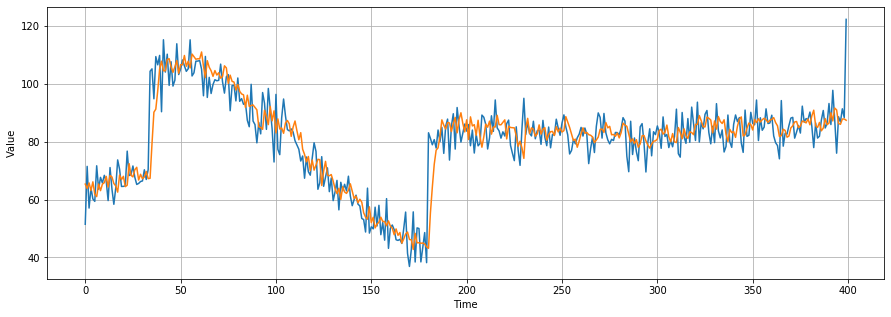

In [15]:
val_outputs = val_outputs.detach().cpu().numpy()
val_targets = val_targets.detach().cpu().numpy()
times = np.arange(len(val_outputs))
plot_series(times, val_targets, val_outputs)

In [21]:
tu.evaluate(model, valdl, [rmse, mae])

[6.989, 5.073]